In [90]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time

In [91]:
# graph_file = './hw3dataset/ibm-5000/ibm-5000f.txt'
# auth_result = './results/ibm-5000/ibm-5000_HITS_authority.txt'
# hubs_result = './results/ibm-5000/ibm-5000_HITS_hub.txt'
graph_file = '../hw3dataset/graph_4.txt'
auth_result = '../results/graph_4/graph_4_HITS_authority.txt'
hubs_result = '../results/graph_4/graph_4_HITS_hub.txt'
f = open(graph_file,'r')
input = []
for line in f.readlines():
    s = line.split('\n')[0]
    s = s.split(',')
    s = tuple(s)
    input.append(s)
f.close

<function TextIOWrapper.close()>

In [92]:
G = nx.DiGraph()
G.add_edges_from(input)
print("節點個數: ",G.number_of_nodes())
print("邊的個數: ",G.number_of_edges())


節點個數:  7
邊的個數:  18


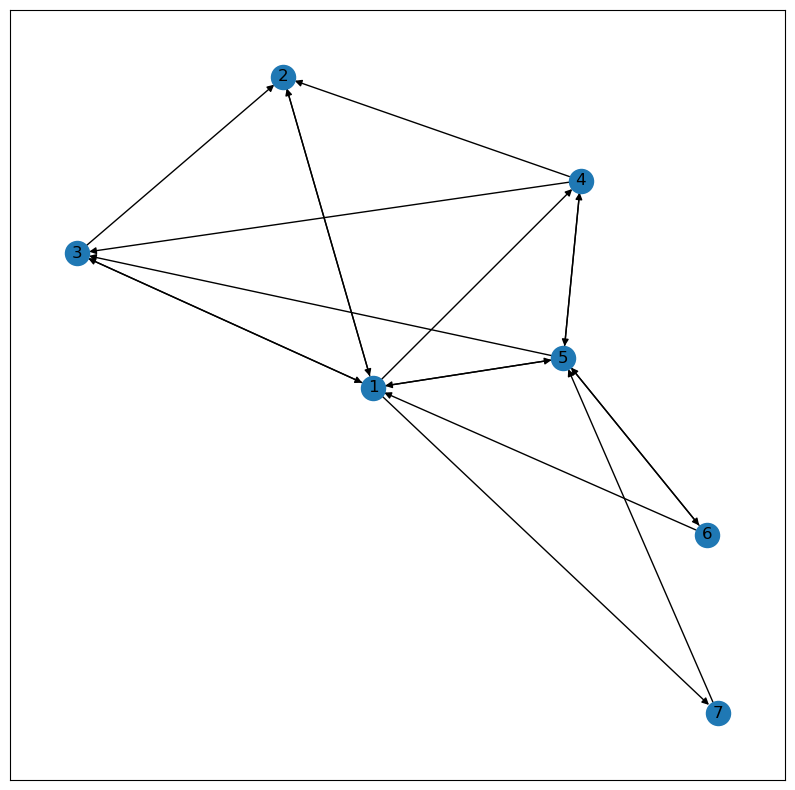

In [93]:
plt.figure(figsize =(10, 10))
nx.draw_networkx(G, with_labels = True)
plt.show()

In [94]:
def Hits(graph,iter):

    hubs = dict.fromkeys(graph,1) # 每個點的hub值都設1
    auth = dict.fromkeys(graph,1) # 每個點的auth值都設1

    for i in range(iter):
        lastHubs = hubs # 儲存上一個圖的hub值
        lastAuth = auth # 儲存上一個圖的auth值
        hubs = dict.fromkeys(lastHubs.keys(), 0) 
        auth = dict.fromkeys(lastHubs.keys(), 0) 
        for node in auth: # node 是 1 2 3 4 5 6
            for predecessors in graph.predecessors(node): # 找出節點的父親(所有指向自己的節點)
                auth[node] += lastHubs[predecessors] # 新的auth值為之前的父親的hub加總
        for node in hubs:
            for successors in graph.successors(node): # 找出節點的兒子(所有自己指出去指到的點)
                hubs[node] += lastAuth[successors] # 新的hub值為之前的兒子的auth加總

        auth_sum = 0
        hubs_sum = 0
        for value in auth.values():
            auth_sum += abs(value)
        for value in hubs.values():
            hubs_sum += abs(value)
        # 對auth和hub做正規化
        for key in auth:
            auth[key] = auth[key]/auth_sum
        for key in hubs:
            hubs[key] = hubs[key]/hubs_sum
        
    return auth, hubs

In [95]:
iter = 30
start = time.time()
auth,hubs = Hits(G,iter)
end = time.time()
print('HITS 運算時間:',(end-start))
keys = []
for key in auth:
    keys.append(int(key))
keys = sorted(keys)
for i in range(len(keys)):
    keys[i] = str(keys[i])
# auth_=sorted(int(auth))
# hubs_=sorted(hubs)
# print(auth_)
# print("hubs:",hubs)

HITS 運算時間: 0.0


In [96]:
hfile = open(hubs_result,"wb")
afile = open(auth_result,"wb")
aans = []
hans = []
for key in keys:
    aans.append(auth[key])
for key in keys:
    hans.append(hubs[key])
aans = np.array(aans)
hans = np.array(hans)
np.savetxt(auth_result, aans, newline = ' ',fmt='%.03f')
np.savetxt(hubs_result, hans, newline = ' ',fmt='%.03f')
hfile.close()
afile.close()